# Final 5 

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import yfinance as yf

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

#### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [2]:
# 1A: Using the Ticker function and get Tesla data 
TSLA = yf.Ticker('TSLA')
TSLA

# 1B: extract Tesla historical data 
tesla_data = TSLA.history(period='50y') #  I used '50y' because 'max' didnot work with me 

# 1C : Reset the index and return data first rows :
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


----------------------------------------------------------------------------------

#### Question 2: Use Webscraping to Extract Tesla Revenue Data¶

In [3]:
#2A.  download a webpage as a text 
url_1 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url_1).text

#2B2. Read the data from the url using pandas and extract the Tesla Quarterly Revenue table and rename columns :
#  read the data from the url 
read_html_Tesla= pd.read_html(url_1) 

# index 1 has the quarterly revenue table
tesla_revenue = read_html_Tesla[1]    

# rename the columns :
cls_names= ['Date', 'Revenue']
tesla_revenue.columns= cls_names

#2C.   remove $ from the revenue column :
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.lstrip('$')
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',', '')

# 2D. Remove NA values from the df:
# check for na values in the dataframe
tesla_revenue.isna().sum()

# remove rows with na values
tesla_revenue.dropna(inplace=True)


#2E. Display the last 5 rows of the tesla_revenue:
tesla_revenue.tail()


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


#### Question 3: Use yfinance to Extract GameStop Stock Data

In [4]:
# 3A.Using the Ticker function and get Gamestop data 
GS = yf.Ticker('GME')

# 3B: extract GME historical data 
GS_data = GS.history(period='99y')
GS_data

#3C. reset index and return the first 5 rows :
GS_data.reset_index(inplace=True)
GS_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


#### Question 4: Use Webscraping to Extract GME Revenue Data

In [5]:

#4A.  download a webpage as a text 
url_2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data2 = requests.get(url_2).text

#4B2. Read the data from the url using pandas and extract the Tesla Quarterly Revenue table and rename columns :

#  read the data from the url 
read_html_GS= pd.read_html(url_2) 

# index 1 has the quarterly revenue table
GS_revenue = read_html_GS[1]    

# rename the columns :
cls_names= ['Date', 'Revenue']
GS_revenue.columns= cls_names
GS_revenue.head()

#4C.   remove $ from the revenue column :
GS_revenue["Revenue"] = GS_revenue["Revenue"].str.lstrip('$')
GS_revenue["Revenue"]= GS_revenue["Revenue"].str.replace(',', '')

# 4D. Remove NA values from the df:

# check for na values in the dataframe
GS_revenue.isna().sum()

# remove rows with na values
GS_revenue.dropna(inplace=True)

# check again 
GS_revenue.isna().sum()

#4E.    Display the last 5 rows of the GS_revenue:
GS_revenue.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph

### Step 1: prepare the dataframes

In [6]:

# #######################################     Tesal     ########################################### #

# convert tesla date to dateformat 
tesla_data['Date']= pd.to_datetime(tesla_data['Date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
tesla_data['Date']= pd.to_datetime(tesla_data['Date'], format='%Y-%m-%d' )

# convert Tesla Revenue date to dateformat 
tesla_revenue['Date']= pd.to_datetime(tesla_revenue['Date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
tesla_revenue['Date']= pd.to_datetime(tesla_revenue['Date'], format='%Y-%m-%d' )

# convert tesla revenue to float 
tesla_revenue['Revenue']= tesla_revenue['Revenue'].astype('float64')

# choose a specific dates
new_tesla_data = tesla_data[tesla_data['Date']<='2021--06-14']
new_tesla_revenue = tesla_revenue[tesla_revenue['Date']<= '2021-04-30']


# ########################################   GameStop    ############################################ #

# convert GS date to dateformat 
GS_data['Date']= pd.to_datetime(GS_data['Date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
GS_data['Date']= pd.to_datetime(GS_data['Date'], format='%Y-%m-%d' )

# convert GS Revenue date to dateformat 
GS_revenue['Date']= pd.to_datetime(GS_revenue['Date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
GS_revenue['Date']= pd.to_datetime(GS_revenue['Date'], format='%Y-%m-%d' )

# convert GS revenue to float 
GS_revenue['Revenue']= GS_revenue['Revenue'].astype('float64')

# choose a specific dates
new_GS_data = GS_data[GS_data['Date']<='2021--06-14']
new_GS_revenue = GS_revenue[GS_revenue['Date']<= '2021-04-30']


### Step 2:  Plot the figures

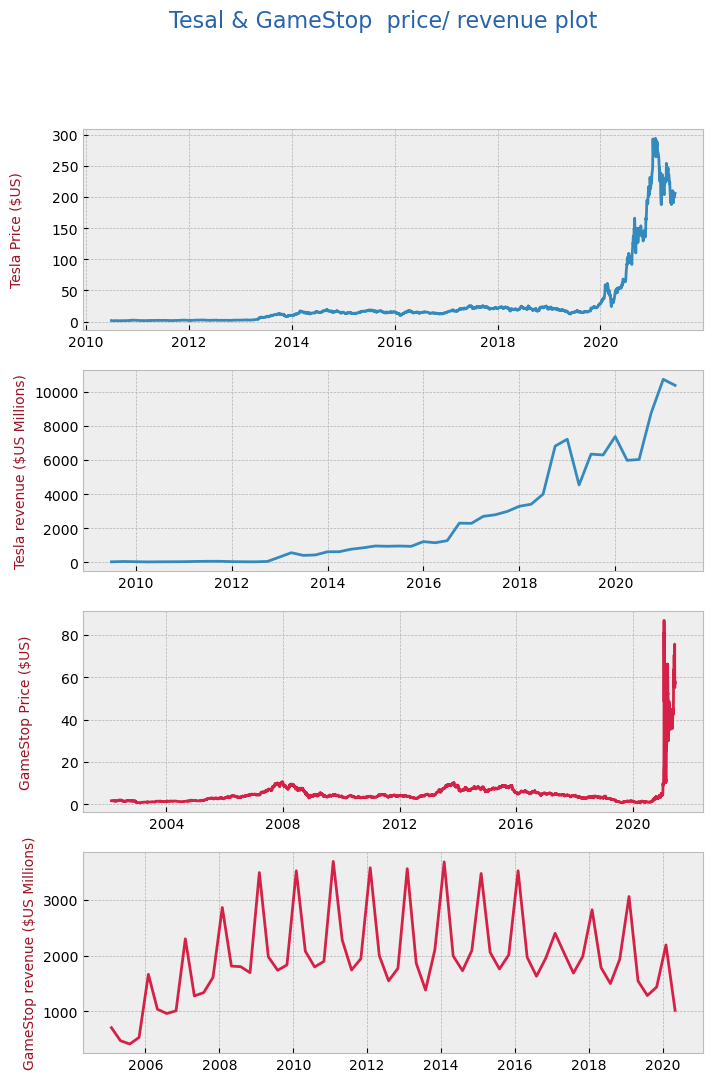

In [18]:
# plot both figures in the same plot using matplotlib library:

# fig style 
plt.style.use('bmh')

# fig setup :
fig , axes = plt.subplots(nrows=4, ncols=1, sharex=False, sharey=False, figsize= (8,12))


# plot Tesla figures
g1= axes[0].plot(new_tesla_data['Date'] ,  new_tesla_data['Close'])
g2= axes[1].plot(new_tesla_revenue['Date'] ,  new_tesla_revenue['Revenue'])


# plot GameStop figures
g3 = axes[2].plot(new_GS_data['Date'] ,  new_GS_data['Close'], color= '#D52147')
g4= axes[3].plot(new_GS_revenue['Date'] ,  new_GS_revenue['Revenue'] , color= '#D52147')



# Titles :

plt.suptitle('Tesal & GameStop  price/ revenue plot',  color= '#2764AF', size= 16 )
axes[0].set_ylabel('Tesla Price ($US)', size='10', color= '#9C1325' ,labelpad=20)
axes[1].set_ylabel('Tesla revenue ($US Millions)', size='10', color= '#9C1325')
axes[2].set_ylabel('GameStop Price ($US)', size='10', color= '#9C1325' ,labelpad=20)
axes[3].set_ylabel('GameStop revenue ($US Millions)', size='10', color= '#9C1325')

plt.show();